# **Expectation Maximization and Gaussian Mixture Models (GMM)**

 ### Membres du Groupe 3 
  Nom  | Prenom  | Matricule 
:------|:--------:|----------:
FORDJOU KAMGANG|LANDRY|19M2366
TEIDA NOUTSA| REMI RAOUL | 19M2447 
 NYA NJIKE| ARMEL | 21S2802   
 NJONOU KOUAYA| GABY | 19M2347   

> ###  **Context et concepts clés**



>L'algorithme Gaussian Mixture Models (GMM) est un algorithme d'apprentissage non supervisé. Le GMM est classé dans les algorithmes de clustering, car il peut être utilisé pour trouver des clusters dans les données. Les concepts clés dont vous devriez avoir entendu parler sont :
 - Distribution gaussienne multivariée
 - Matrice de covariance
 - Vecteur moyen de données multivariées

 **Nous voulons utiliser des modèles de mélange gaussien pour trouver des clusters dans un ensemble de données à partir duquel nous connaissons (ou supposons connaître) le nombre de clusters contenus dans cet ensemble de données, mais nous ne savons pas où se trouvent ces clusters ni comment ils sont façonnés.** Trouver ces clusters est la tâche du GMM. Nous essayons de **trouver un certain nombre de distributions gaussiennes** qui peuvent être utilisées pour décrire la forme de notre ensemble de données.
 > ### **PRINCIPE** 
 >> Comme son nom l'indique, un **modèle de mélange gaussien implique le mélange** (c'est-à-dire la superposition) de plusieurs distributions gaussiennes. Ici, plutôt que d'identifier les clusters par les centroïdes "les plus proches", nous ajustons un ensemble de k gaussiennes aux données. Et nous estimons les paramètres de distribution gaussienne tels que la moyenne et la variance pour chaque cluster et le poids d'un cluster. Après avoir appris les paramètres de chaque point de données, nous pouvons calculer les probabilités qu'il appartienne à chacun des clusters.

 > ### **Pourquoi GMM**
 >> Si nous avons des données où nous supposons que les clusters ne sont pas définis par de simples cercles mais par des formes ellipsoïdes plus complexes, nous préférons l'approche GMM à l'approche KNN.
 >>De même que K-mean les GMM peuvent être utilisé pour classer les données : Quoi qu'il y ait plusieurs avantages à utilisé GMM
 >>> * k-means ne tient pas compte de la variance(qui définissent la forme de la distribution)
 >>> * K-mean place un cercle au centre de chaque cluster ( Inadéquat si les données ne sont pas circulaires )
 >>> * GMM prend en compte plusieurs formes de modèle
 >>> * **K-mean fait une classification deterministe où GMM est plutôt soft**
 >>>> *In Sklearn,gmm.predict(X) the model assigns every data point to one of the clusters and  gmm.predict_proba(X) function return the* probabilities that a data point belongs to each of the K clusters*

 ### **CAS PRATIQUE** : Construction d'un modèle GMM


**Rappelez-vous que nous voulons avoir K modèles gaussiens ajustés à nos K groupes de données. Alors, comment pouvons-nous faire en sorte que ces trois guassiens choisis au hasard s'adaptent automatiquement aux données ?**
>> Nous utilisons ici une approche appelée **espérance-maximisation (EM)**, qui est particulièrement populaire pour l'ajustement d'un tas de gaussiennes aux données.

#### - Description du jeux de données
Nous avons utilisé un jeu de données appelé "CC GENERAL". Il résume le comportement d'utilisation d'environ 8951 titulaires actifs de cartes de crédit au cours de 6 mois. Le fichier est au niveau client avec 18 variables comportementales.

Voici le dictionnaire de données pour l'ensemble de données de carte de crédit :

* CUSTID: Identification du titulaire de la carte
* BALANCE: Montant du solde restant sur leur compte pour effectuer des achats (
* BALANCEFREQUENCY : fréquence de mise à jour du solde, score entre 0 et 1 (1 = fréquemment mis à jour, 0 = pas fréquemment mis à jour)
* PURCHASES: Montant des achats effectués depuis le compte
* SINGLE PURCHASES: Montant maximum des achats effectués en une seul fois
* CHARGED PURCHASES: Montant de l'achat effectué en plusieurs fois
* CASHADVANCE: Paiement d'avance donné par l'utilisateur
* PURCHASESFREQUENCY: Fréquence des achats, score entre 0 et 1 (1 = fréquemment acheté, 0 = pas fréquemment acheté)
* ONEOFFPURCHASESFREQUENCY: fréquence des achats en une seule fois (1 = fréquemment acheté, 0 = peu fréquent)
* PURCHASESINSTALLMENTSFREQUENCY: Fréquence des achats en plusieurs fois (1 = fréquemment effectués, 0 = peu fréquents)
* CASHADVANCEFREQUENCY: Fréquence de versement de l'avance en espèces
* CASHADVANCETRX: Nombre de transactions effectuées avec "Cash in Advanced"
* PURCHASESTRX: Nombre de transactions d'achat effectuées
* CREDITLIMIT: Limite de carte de crédit pour l'utilisateur
* PAYMENTS: Montant du paiement effectué par l'utilisateur
* MINIMUM_PAYMENTS: Montant minimum des paiements effectués par l'utilisateur
* PRCFULLPAYMENT: Pourcentage du paiement total payé par l'utilisateur
* TENURE: Durée du service de carte de crédit pour l'utilisateur

In [ ]:
from scipy.stats import norm
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import style
style.use('fivethirtyeight')
from pandas import DataFrame 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os
#os.chdir("./TP ML")
wd = os.getcwd()
wd


'/home/armelnjike/Documents/SEMESTRE 8/MACHINE LEARNING/2023/TP ML'

In [ ]:

#d_f = pd.read_csv('.C')
wd = os.getcwd()

raw_df = pd.read_csv('./CC GENERAL.csv')
raw_df = raw_df.drop('CUST_ID', axis = 1) 
raw_df.fillna(method ='ffill', inplace = True) 
raw_df.head(2)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182       95.4               0.0   
1  3202.467416           0.909091        0.0               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                          0.083333   
1                         0.0                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12

#### Normalisation des données

In [ ]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(raw_df) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 3) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 

X_principal.columns = ['P1', 'P2','P3'] 
X_principal = X_principal.iloc[:500,:]
  
X_principal.head(2)
X_principal = np.stack((X_principal.P1 ,X_principal.P2, X_principal.P3)).flatten()
#plt.scatter(X_principal.P1,X_principal.P2,X_principal.P3)

In [ ]:
"""Create the array r with dimensionality nxK"""
r = np.zeros((len(X_principal),3))  
print('Dimensionality','=',np.shape(r))

Dimensionality = (1500, 3)


#### Instancier une gaussienne Standard

In [ ]:
gauss_1 = norm(loc=-5,scale=5) 
gauss_2 = norm(loc=8,scale=3)
gauss_3 = norm(loc=1.5,scale=1)

"""Instantiate the random mu_c"""
m = np.array([1/3,1/3,1/3]) # We expect to have three clusters 

pi = m/np.sum(m)


"""Instantiate the random pi_c"""
#pi = np.array([1/3,1/3,1/3]) # We expect to have three clusters 



'Instantiate the random pi_c'

#### Probabilité pour chaque point d'appartenir à la gaussienne g

In [ ]:
for c,g,p in zip(range(3),[gauss_1,gauss_2,gauss_3],pi):
    r[:,c] = p * g.pdf(X_principal) # Écrivez la probabilité que x appartienne à la gaussienne c dans la colonne c.
                          # Avec cela, nous obtenons un tableau 26850x3 rempli avec la probabilité que chaque x_i appartienne à l'une des gaussiennes
print('Dimensionality','=',np.shape(r))

Dimensionality = (1500, 3)


$r_ic$ est la probabilité que $x_i$ soit dans le cluster c
Ainsi, chaque ligne i dans r nous donne la probabilité pour $x_i$
appartenir à une gaussienne (une colonne par gaussienne).

In [ ]:
"""Normaliser les probabilités de sorte que chaque ligne de r soit égale à 1
"""
for i in range(len(r)):
    r[i] = r[i]/(np.sum(r,axis=1)[i])

"""Dans le dernier calcul nous avons normalisé les probabilités r_ic(proba que x_i dans cluster c).  Since we want to know the probability
 that x_i belongs 
to gaussian g, we have to do smth. like a simple calculation of percentage where we want to know how likely it is in %  that
x_i belongs to gaussian g. To realize this, we must dive the probability of each r_ic by the total probability r_i (this is done by 
summing up each row in r and divide each value r_ic by sum(np.sum(r,axis=1)[r_i] )). To get this,
look at the above plot and pick an arbitrary datapoint. Pick one gaussian and imagine the probability that this datapoint
belongs to this gaussian. This value will normally be small since the point is relatively far away right? So what is
the percentage that this point belongs to the chosen gaussian? --> Correct, the probability that this datapoint belongs to this 
gaussian divided by the sum of the probabilites for this datapoint for all three gaussians."""
    
print(r)
print(np.sum(r,axis=1)) # As we can see, as result each row sums up to one, just as we want it.


[[0.48016518 0.02191924 0.49791557]
 [0.49574262 0.02190041 0.48235697]
 [0.17962551 0.02013139 0.80024311]
 ...
 [0.33650349 0.02147356 0.64202295]
 [0.13146357 0.02019693 0.8483395 ]
 [0.28797397 0.02109914 0.69092689]]
[1. 1. 1. ... 1. 1. 1.]


**Maintenant , on a les probabilités pour chaques $x_i$ d'appartenier à une gaussienne g**
> #### But initial : Nous voulons ajuster autant de gaussiennes aux données.
>> Maintenant, il serait probablement le cas qu'un cluster se compose de plus de points de données qu'un autre et ainsi la probabilité pour chaque $x_i$ d'appartenir à ce "grand" cluster est beaucoup plus grande que d'appartenir à l'un des autres.
>> On l'implemente, en multipliant la probabilité pour chaque $r_ic$ avec la fraction de points que nous supposons appartenir à ce cluster c. **On appelle cette variable $\pi_c$**

#### Affichage des données

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

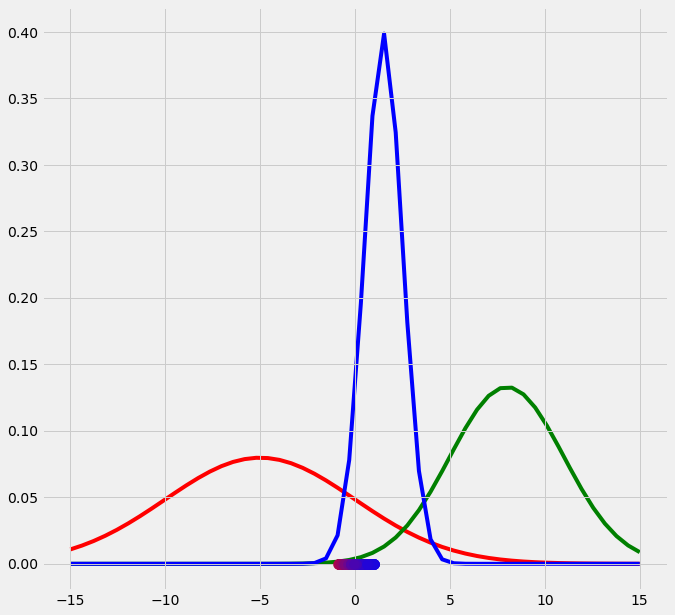

In [ ]:
"""Plot the data"""

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)


for i in range(len(r)):
    ax0.scatter(X_principal[i],0,c=np.array([r[i][0],r[i][1],r[i][2]]),s=100) # We have defined the first column as red, the second as
                                                                        # green and the third as blue



for g,c in zip([gauss_1.pdf(np.linspace(-15,15)),gauss_2.pdf(np.linspace(-15,15)),gauss_3.pdf(np.linspace(-15,15))],['r','g','b']):
    ax0.plot(np.linspace(-15,15),g,c=c,zorder=0)

    
    
plt.show()

### 3. Algorithme
> ### - Etape d'estimation 
>  On a définit le nombre de cluster qu'on veut ajuster a nos données
>>On va initialiser les paramètres : **Moyenne** $\mu_c$  , la **covariance** $\sigma_c$ et le **poid de cluster** $\pi_c$ pour chaque cluster c

Calcul de $r_ic$ qui représente la probabilité que l'observation **i** appartienne au cluster **c**

>>>>>> ## $r_ic = \frac{\pi_c * N(x_i | \mu_c , \Sigma_c)}{\sum_{k = 1}^{n}{\pi_k N(x_i | \mu_k, \Sigma_k )}}$

$N(x_i, \mu , \Sigma)$ décrit la Gaussienne multivalué avec : $N(x_i | \mu_c , \Sigma_c) = \frac{1}{ (2 \pi)^{\frac{n}{2}}| \Sigma_c |^ {\frac{1}{2} } } \exp( -\frac{1}{2}(x_i - \mu_c)^T \Sigma_c^{-1}(x_i - \mu_c) ) $

>> Si un $x_i$ est proche d'un cluster c, alors $r_ic$ sera grand

> ### - Etape Maximisation

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

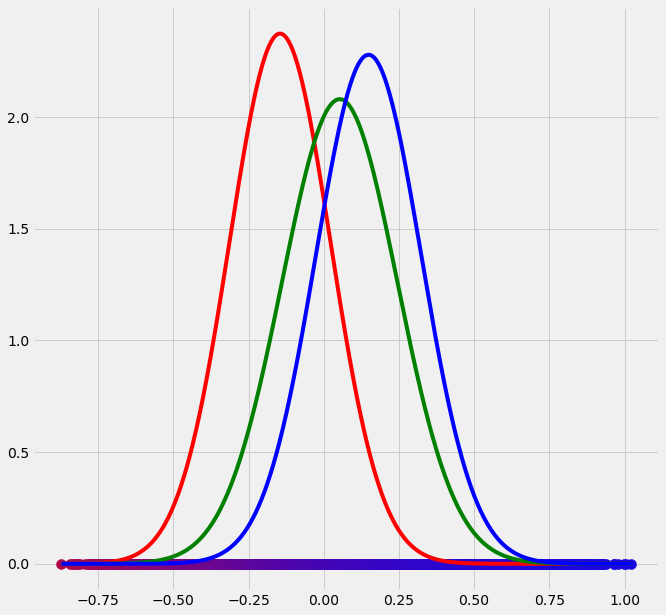

In [ ]:
"""calculate m_c"""
m_c = []
for c in range(len(r[0])):
    m = np.sum(r[:,c])
    m_c.append(m) # For each cluster c, calculate the m_c and add it to the list m_c
    
"""calculate pi_c"""
pi_c = []
for m in m_c:
    pi_c.append(m/np.sum(m_c)) # For each cluster c, calculate the fraction of points pi_c which belongs to cluster c

"""calculate mu_c"""
mu_c = np.sum(X_principal.reshape(len(X_principal),1)*r,axis=0)/m_c


"""calculate var_c"""
var_c = []

for c in range(len(r[0])):
    var_c.append((1/m_c[c])*np.dot(((np.array(r[:,c]).reshape(1500,1))*(X_principal.reshape(len(X_principal),1)-mu_c[c])).T,(X_principal.reshape(len(X_principal),1)-mu_c[c])))
  

    
    
"""Update the gaussians"""

gauss_1 = norm(loc=mu_c[0],scale=var_c[0]) 
gauss_2 = norm(loc=mu_c[1],scale=var_c[1])
gauss_3 = norm(loc=mu_c[2],scale=var_c[2])



"""Plot the data"""

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)


for i in range(len(r)):
    ax0.scatter(X_principal[i],0,c=np.array([r[i][0],r[i][1],r[i][2]]),s=100) 


"""Plot the gaussians"""


for g,c in zip([gauss_1.pdf(np.sort(X_principal).reshape(1500,1)),gauss_2.pdf(np.sort(X_principal).reshape(1500,1)),gauss_3.pdf(np.sort(X_principal).reshape(1500,1))],['r','g','b']):
    ax0.plot(np.sort(X_principal),g,c=c)

    

    
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

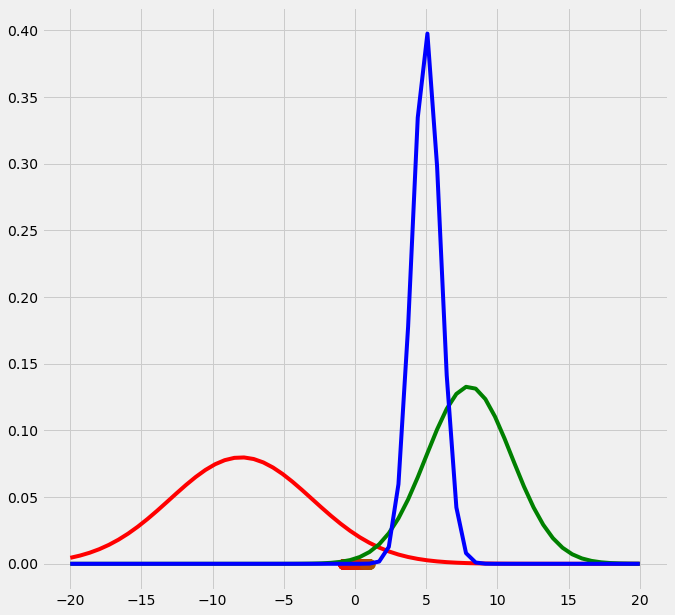

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

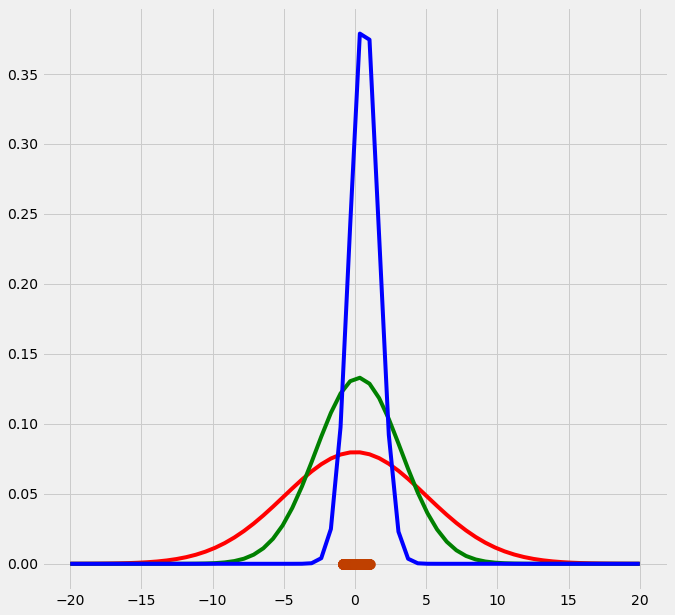

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

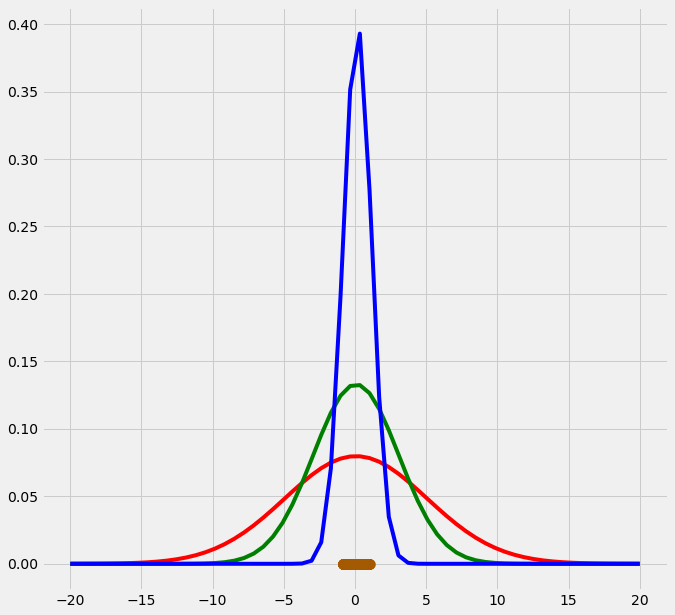

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

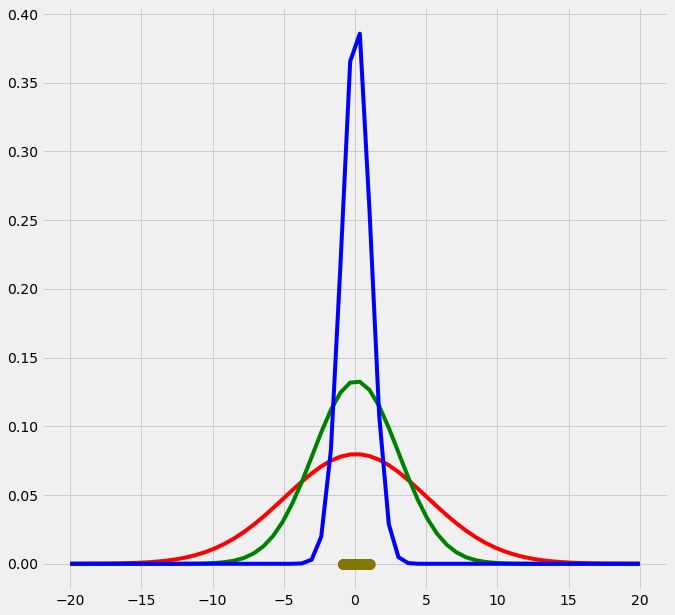

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

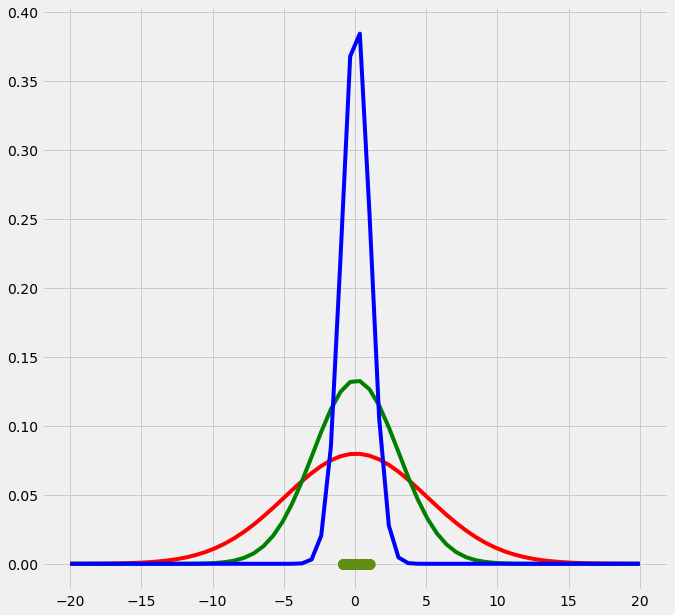

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

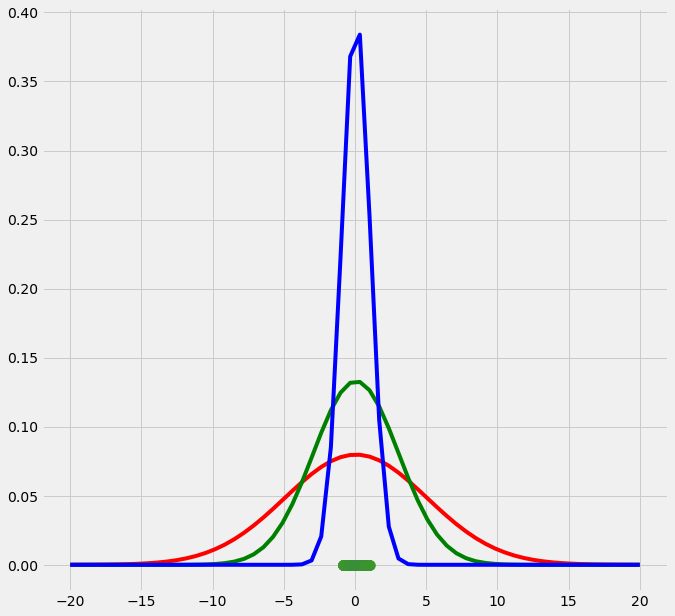

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

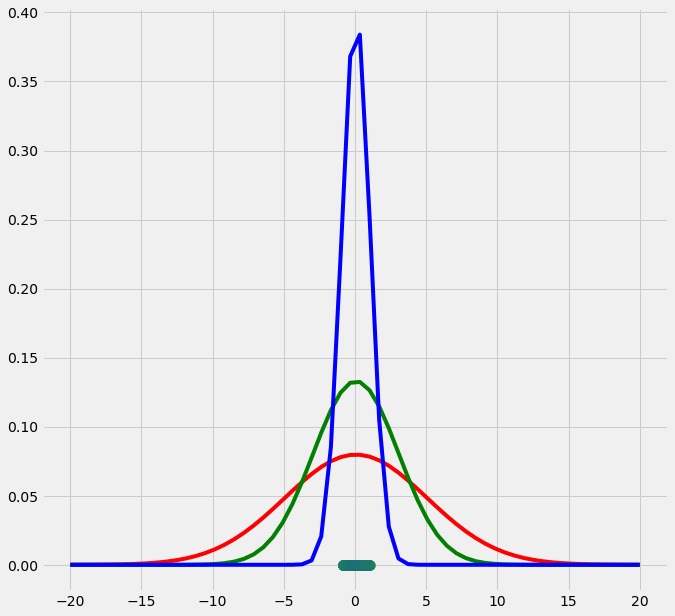

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

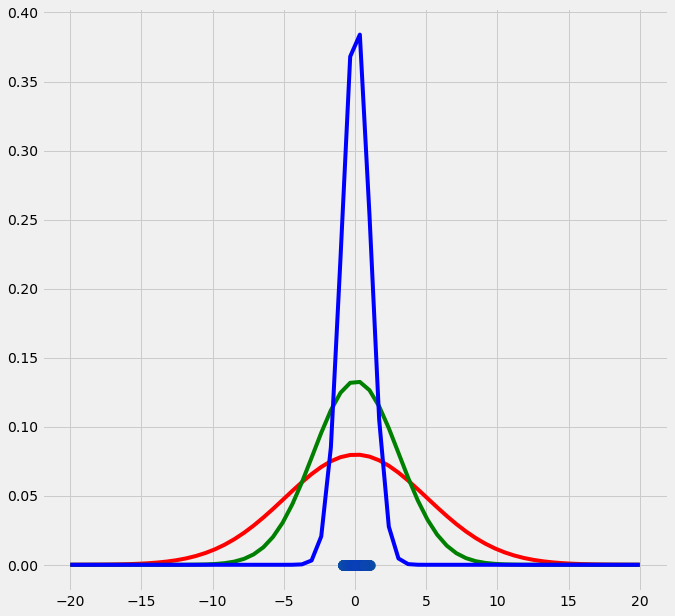

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

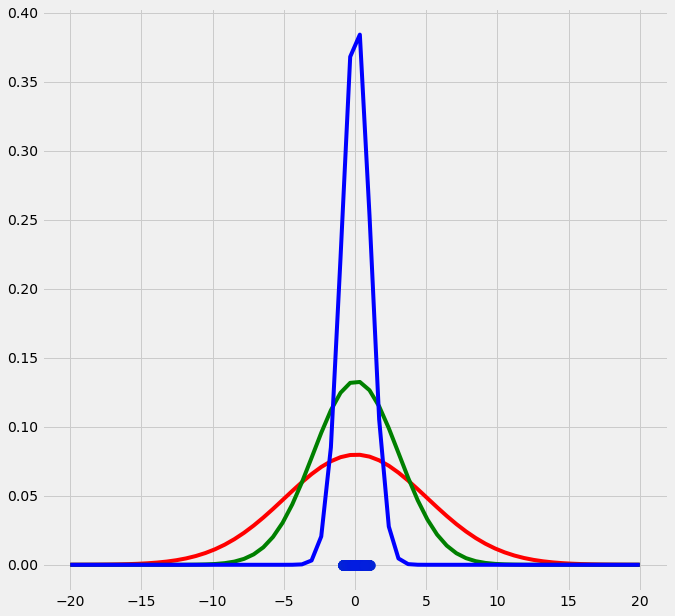

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

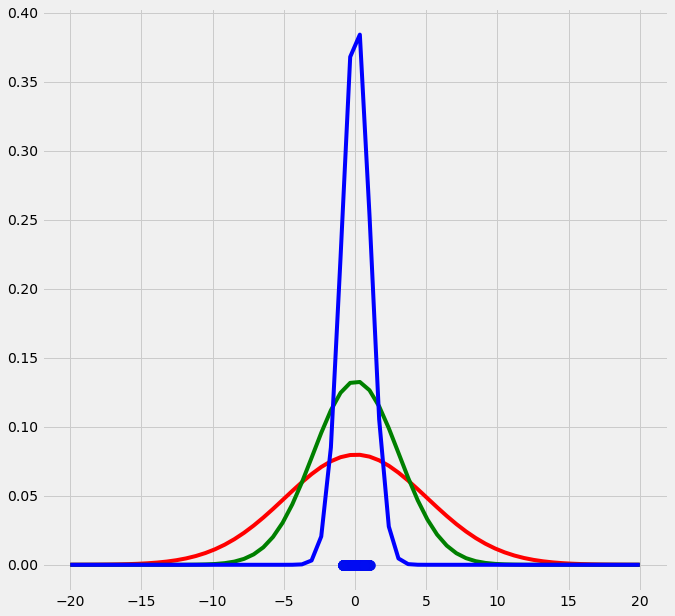

In [ ]:
class GM1D:
    
    def __init__(self,X,iterations):
        self.iterations = iterations
        self.X = X
        self.mu = None
        self.pi = None
        self.var = None
  

    def run(self):
        

        """
        Instantiate the random mu, pi and var
        """
        self.mu = [-8,8,5]
        self.pi = [1/3,1/3,1/3]
        self.var = [5,3,1]
        
        
        
        """
        E-Step
        """
        
        for iter in range(self.iterations):

            """Create the array r with dimensionality nxK"""
            r = np.zeros((len(X_principal),3))  

  
            """
            Probability for each datapoint x_i to belong to gaussian g 
            """
            for c,g,p in zip(range(3),[norm(loc=self.mu[0],scale=self.var[0]),
                                       norm(loc=self.mu[1],scale=self.var[1]),
                                       norm(loc=self.mu[2],scale=self.var[2])],self.pi):
                r[:,c] = p*g.pdf(X_principal) # Write the probability that x belongs to gaussian c in column c. 
                                      # Therewith we get a 60x3 array filled with the probability that each x_i belongs to one of the gaussians
            """
            Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
            cluster c
            """
            for i in range(len(r)):
                r[i] = r[i]/(np.sum(pi)*np.sum(r,axis=1)[i])


            """Plot the data"""

            fig = plt.figure(figsize=(10,10))
            ax0 = fig.add_subplot(111)


            for i in range(len(r)):
                ax0.scatter(self.X[i],0,c=np.array([r[i][0],r[i][1],r[i][2]]),s=100) 


            """Plot the gaussians"""


            for g,c in zip([norm(loc=self.mu[0],scale=self.var[0]).pdf(np.linspace(-20,20,num=60)),
                            norm(loc=self.mu[1],scale=self.var[1]).pdf(np.linspace(-20,20,num=60)),
                            norm(loc=self.mu[2],scale=self.var[2]).pdf(np.linspace(-20,20,num=60))],['r','g','b']):
                ax0.plot(np.linspace(-20,20,num=60),g,c=c)
            
            
            
            """M-Step"""
    

            """calculate m_c"""
            m_c = []
            for c in range(len(r[0])):
                m = np.sum(r[:,c])
                m_c.append(m) # For each cluster c, calculate the m_c and add it to the list m_c

            """calculate pi_c"""
            for k in range(len(m_c)):
                self.pi[k] = (m_c[k]/np.sum(m_c)) # For each cluster c, calculate the fraction of points pi_c which belongs to cluster c

            """calculate mu_c"""
            self.mu = np.sum(self.X.reshape(len(self.X),1)*r,axis=0)/m_c


            """calculate var_c"""
            var_c = []

            for c in range(len(r[0])):
                var_c.append((1/m_c[c])*np.dot(((np.array(r[:,c]).reshape(1500,1))*(self.X.reshape(len(self.X),1)-self.mu[c])).T,(self.X.reshape(len(self.X),1)-self.mu[c])))



            plt.show()
    

GM1D = GM1D(X_principal,10)
GM1D.run()  

**On peut constater que nos 3 gaussiennes générés aléatoirement se sont ajustées aux données** 
>> On pourait tracer la fonction de la log-vraissemblance pour voir si la fonction converge avec les itérations.
## **CAS MILTIDIMENTIONNEL**
>>> - La différence avec le cas unidimentionnel est que notre jeux de données sera constitué de plusieurs colones : 
>>> - **une observation sera donc désormais un vecteur ($\boldsymbol{x_i}$) et plus un scalaire.** .
>>> - De même que la moyenne par classe $\mu_c$ qui devient le vecteur $\boldsymbol{\mu_c}$ .
>>> - variance n'est plus un scalaire pour chaque cluster c ($\sigma^2$) mais une **matrice de covariance** $\boldsymbol{\Sigma_c}$ de dimension nxn où n est le nombre de colonnes du dataset. les calculs restent les mêmes!



In [ ]:
import sklearn
from sklearn.datasets._samples_generator import make_blobs
from scipy.stats import multivariate_normal
#from sklearn.datasets.samples_generator import make_blobs
# 0. Create dataset
X,Y = make_blobs(cluster_std=1.5,random_state=20,n_samples=500,centers=3)

# Stratch dataset to get ellipsoid data
X = np.dot(X,np.random.RandomState(0).randn(2,2))
print('Dimensionality','=',np.shape(X))
X

Dimensionality = (500, 2)


array([[-1.94886745e+01, -1.15266043e+00],
       [ 1.34486774e+01,  1.59852848e+01],
       [-2.01324733e+01,  3.34683133e-01],
       [-1.54749721e+01,  4.56804516e+00],
       [ 1.25196957e+01,  1.93705900e+01],
       [ 1.39050915e+01,  2.17297756e+01],
       [ 1.85868323e+01,  1.60544530e+01],
       [ 1.71759660e+01,  1.26309971e+01],
       [-1.42959173e+01, -8.10389821e-01],
       [-1.11809348e+01,  9.51536682e+00],
       [-1.14008831e+01,  4.58610927e+00],
       [ 8.66406658e+00,  1.48728094e+01],
       [ 2.25281987e+01,  2.36793026e+01],
       [ 2.39404998e+01,  2.51551117e+01],
       [ 2.20895414e+01,  2.01519773e+01],
       [-1.43232173e+01,  1.66337340e-01],
       [ 6.25901722e+00,  1.85124638e+01],
       [-1.34700126e+01,  3.44728067e+00],
       [ 2.36608353e+01,  2.31090588e+01],
       [ 1.85593614e+01,  1.51750797e+01],
       [-1.47708801e+01,  5.06059746e+00],
       [-1.60391117e+01, -9.31975943e-02],
       [ 1.08207003e+01,  1.78218352e+01],
       [ 1.

In [ ]:
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X2_principal = pca.fit_transform(normalized_df) 
X2_principal = pd.DataFrame(X2_principal) 

X2_principal.columns = ['P1', 'P2'] 
X2_principal = X2_principal.iloc[:200,:]
  
X2_principal.head(2)
X2_principal = np.stack((X2_principal.P1 ,X2_principal.P2)).flatten()
#plt.scatter(X_principal.P1,X_principal.P2,X_principal.P3)
print('Dimensionality','=',np.shape(X2_principal))

Dimensionality = (400,)


[0.0, 0.9973492812403046, 0.002650718759695404]

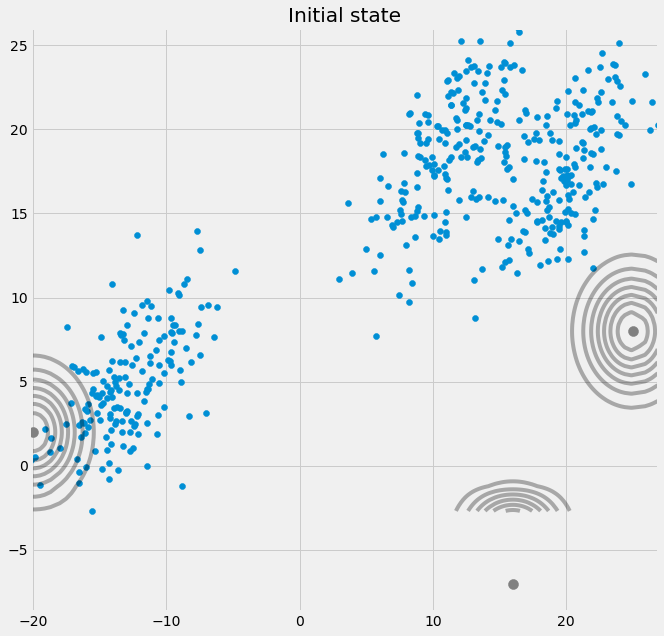

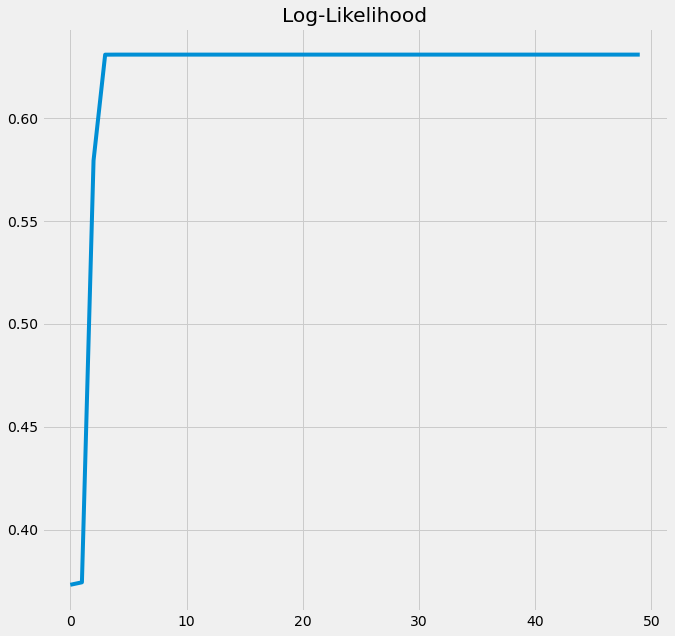

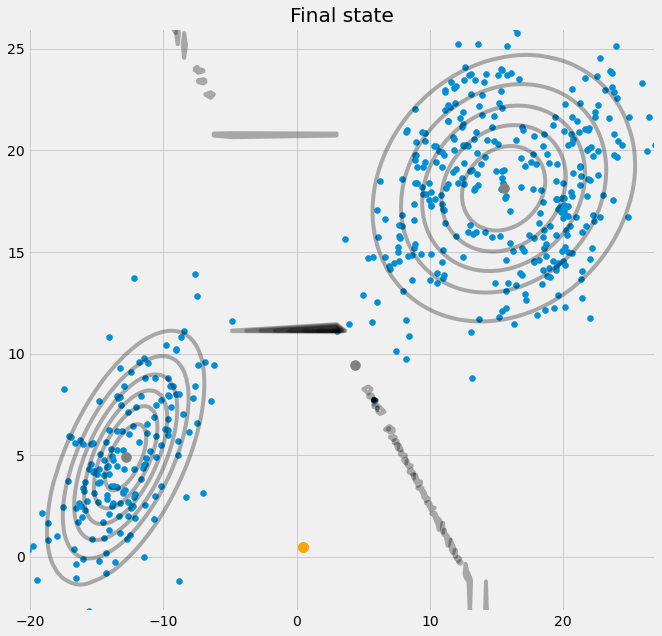

In [ ]:
class GMM:
    
    def __init__(self,X,number_of_sources,iterations):
        self.iterations = iterations
        self.number_of_sources = number_of_sources
        self.X = X
        self.mu = None
        self.pi = None
        self.cov = None
        self.XY = None
        
    

    """Define a function which runs for iterations, iterations"""
    def run(self):
        self.reg_cov = 1e-6*np.identity(len(self.X[0]))
        x,y = np.meshgrid(np.sort(self.X[:,0]),np.sort(self.X[:,1]))
        self.XY = np.array([x.flatten(),y.flatten()]).T
           
                    
        """ 1. Set the initial mu, covariance and pi values"""
        self.mu = np.random.randint(min(self.X[:,0]),max(self.X[:,0]),size=(self.number_of_sources,len(self.X[0]))) # This is a nxm matrix since we assume n sources (n Gaussians) where each has m dimensions
        self.cov = np.zeros((self.number_of_sources,len(X[0]),len(X[0]))) # We need a nxmxm covariance matrix for each source since we have m features --> We create symmetric covariance matrices with ones on the digonal
        for dim in range(len(self.cov)):
            np.fill_diagonal(self.cov[dim],5)


        self.pi = np.ones(self.number_of_sources)/self.number_of_sources # Are "Fractions"
        log_likelihoods = [] # In this list we store the log likehoods per iteration and plot them in the end to check if
                             # if we have converged
            
        """Plot the initial state"""    
        fig = plt.figure(figsize=(10,10))
        ax0 = fig.add_subplot(111)
        ax0.scatter(self.X[:,0],self.X[:,1])
        ax0.set_title('Initial state')
        for m,c in zip(self.mu,self.cov):
            c += self.reg_cov
            multi_normal = multivariate_normal(mean=m,cov=c)
            ax0.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='black',alpha=0.3)
            ax0.scatter(m[0],m[1],c='grey',zorder=10,s=100)
        
        for i in range(self.iterations):               

            """E Step"""
            r_ic = np.zeros((len(self.X),len(self.cov)))

            for m,co,p,r in zip(self.mu,self.cov,self.pi,range(len(r_ic[0]))):
                co+=self.reg_cov
                mn = multivariate_normal(mean=m,cov=co)
                r_ic[:,r] = p*mn.pdf(self.X)/np.sum([pi_c*multivariate_normal(mean=mu_c,cov=cov_c).pdf(X) for pi_c,mu_c,cov_c in zip(self.pi,self.mu,self.cov+self.reg_cov)],axis=0)

            """
            The above calculation of r_ic is not that obvious why I want to quickly derive what we have done above.
            First of all the nominator:
            We calculate for each source c which is defined by m,co and p for every instance x_i, the multivariate_normal.pdf() value.
            For each loop this gives us a 100x1 matrix (This value divided by the denominator is then assigned to r_ic[:,r] which is in 
            the end a 100x3 matrix).
            Second the denominator:
            What we do here is, we calculate the multivariate_normal.pdf() for every instance x_i for every source c which is defined by
            pi_c, mu_c, and cov_c and write this into a list. This gives us a 3x100 matrix where we have 100 entrances per source c.
            Now the formula wants us to add up the pdf() values given by the 3 sources for each x_i. Hence we sum up this list over axis=0.
            This gives us then a list with 100 entries.
            What we have now is FOR EACH LOOP a list with 100 entries in the nominator and a list with 100 entries in the denominator
            where each element is the pdf per class c for each instance x_i (nominator) respectively the summed pdf's of classes c for each 
            instance x_i. Consequently we can now divide the nominator by the denominator and have as result a list with 100 elements which we
            can then assign to r_ic[:,r] --> One row r per source c. In the end after we have done this for all three sources (three loops)
            and run from r==0 to r==2 we get a matrix with dimensionallity 100x3 which is exactly what we want.
            If we check the entries of r_ic we see that there mostly one element which is much larger than the other two. This is because
            every instance x_i is much closer to one of the three gaussians (that is, much more likely to come from this gaussian) than
            it is to the other two. That is practically speaing, r_ic gives us the fraction of the probability that x_i belongs to class
            c over the probability that x_i belonges to any of the classes c (Probability that x_i occurs given the 3 Gaussians).
            """

            """M Step"""

            # Calculate the new mean vector and new covariance matrices, based on the probable membership of the single x_i to classes c --> r_ic
            self.mu = []
            self.cov = []
            self.pi = []
            log_likelihood = []

            for c in range(len(r_ic[0])):
                m_c = np.sum(r_ic[:,c],axis=0)
                mu_c = (1/m_c)*np.sum(self.X*r_ic[:,c].reshape(len(self.X),1),axis=0)
                self.mu.append(mu_c)

                # Calculate the covariance matrix per source based on the new mean
                self.cov.append(((1/m_c)*np.dot((np.array(r_ic[:,c]).reshape(len(self.X),1)*(self.X-mu_c)).T,(self.X-mu_c)))+self.reg_cov)
                # Calculate pi_new which is the "fraction of points" respectively the fraction of the probability assigned to each source 
                self.pi.append(m_c/np.sum(r_ic)) # Here np.sum(r_ic) gives as result the number of instances. This is logical since we know 
                                                # that the columns of each row of r_ic adds up to 1. Since we add up all elements, we sum up all
                                                # columns per row which gives 1 and then all rows which gives then the number of instances (rows) 
                                                # in X --> Since pi_new contains the fractions of datapoints, assigned to the sources c,
                                                # The elements in pi_new must add up to 1

            
            
            """Log likelihood"""
            log_likelihoods.append(np.log(np.sum([k*multivariate_normal(self.mu[i],self.cov[j]).pdf(X) for k,i,j in zip(self.pi,range(len(self.mu)),range(len(self.cov)))])))

            

            """
            This process of E step followed by a M step is now iterated a number of n times. In the second step for instance,
            we use the calculated pi_new, mu_new and cov_new to calculate the new r_ic which are then used in the second M step
            to calculat the mu_new2 and cov_new2 and so on....
            """

        fig2 = plt.figure(figsize=(10,10))
        ax1 = fig2.add_subplot(111) 
        ax1.set_title('Log-Likelihood')
        ax1.plot(range(0,self.iterations,1),log_likelihoods)
        #plt.show()
    
    """Predict the membership of an unseen, new datapoint"""
    def predict(self,Y):
        # PLot the point onto the fittet gaussians
        fig3 = plt.figure(figsize=(10,10))
        ax2 = fig3.add_subplot(111)
        ax2.scatter(self.X[:,0],self.X[:,1])
        for m,c in zip(self.mu,self.cov):
            multi_normal = multivariate_normal(mean=m,cov=c)
            ax2.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='black',alpha=0.3)
            ax2.scatter(m[0],m[1],c='grey',zorder=10,s=100)
            ax2.set_title('Final state')
            for y in Y:
                ax2.scatter(y[0],y[1],c='orange',zorder=10,s=100)
        prediction = []        
        for m,c in zip(self.mu,self.cov):  
            #print(c)
            prediction.append(multivariate_normal(mean=m,cov=c).pdf(Y)/np.sum([multivariate_normal(mean=mean,cov=cov).pdf(Y) for mean,cov in zip(self.mu,self.cov)]))
        #plt.show()
        return prediction
         
    
    
GMM = GMM(X,3,50)     
GMM.run()
GMM.predict([[0.5,0.5]])


## Avec sklearn

Converged: True
[[1.94756664e-93 4.00098007e-33 9.36305075e-82 1.00000000e+00
  5.02664415e-44]]


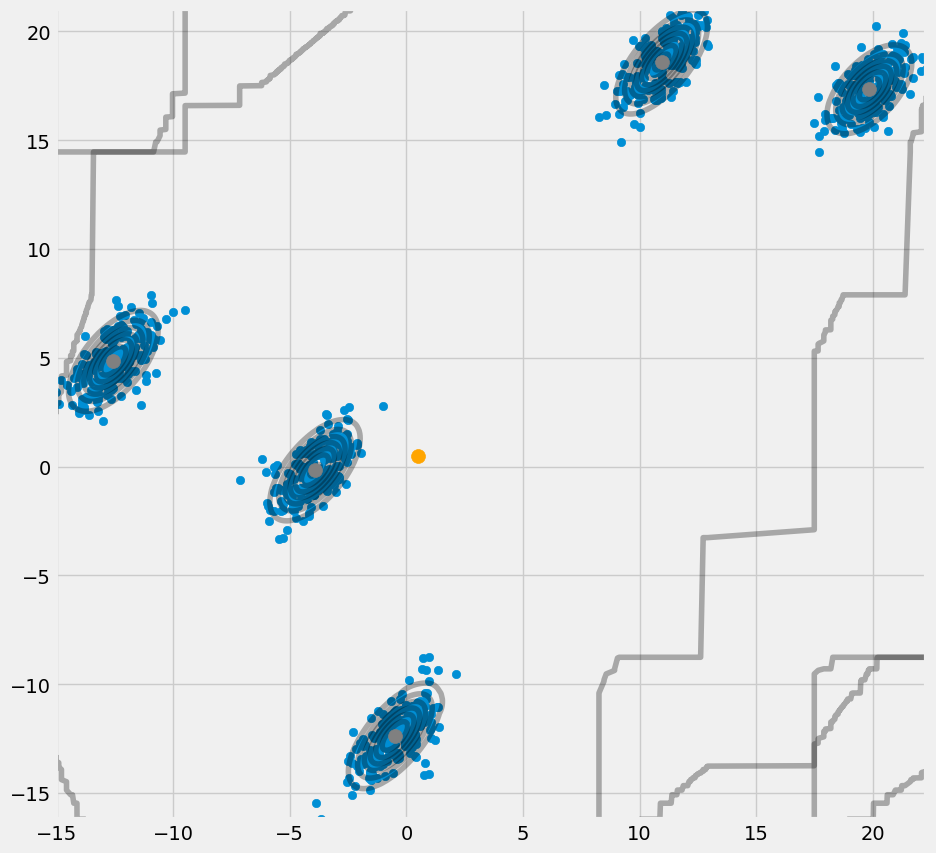

In [ ]:
import sklearn
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.datasets import make_blobs
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture

# 0. Create dataset
X,Y = make_blobs(cluster_std=0.5,random_state=20,n_samples=1000,centers=5)

# Stratch dataset to get ellipsoid data
X = np.dot(X,np.random.RandomState(0).randn(2,2))

x,y = np.meshgrid(np.sort(X[:,0]),np.sort(X[:,1]))
XY = np.array([x.flatten(),y.flatten()]).T

GMM = GaussianMixture(n_components=5).fit(X) # Instantiate and fit the model
print('Converged:',GMM.converged_) # Check if the model has converged
means = GMM.means_ 
covariances = GMM.covariances_


# Predict
Y = np.array([[0.5],[0.5]])
prediction = GMM.predict_proba(Y.T)
print(prediction)

# Plot   
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.scatter(X[:,0],X[:,1])
ax0.scatter(Y[0,:],Y[1,:],c='orange',zorder=10,s=100)
for m,c in zip(means,covariances):
    multi_normal = multivariate_normal(mean=m,cov=c)
    ax0.contour(np.sort(X[:,0]),np.sort(X[:,1]),multi_normal.pdf(XY).reshape(len(X),len(X)),colors='black',alpha=0.3)
    ax0.scatter(m[0],m[1],c='grey',zorder=10,s=100)
    
plt.show()

## Points bien comprises

* Les **models de mélange gaussiennes** s'adapte bien aux données dont leurs représentations peut être approximer par une éllipse plus que l'algorithme **K-Means**
* L'algorithme **EM(Expectation Maximization)** s'éxecute en trois principales étapes. A savoir
>- Initialisation des paramètres du modele ($\mu_c$ ,$\pi_c$ (),$\boldsymbol{\Sigma_c}$) qui sont respectivement la moyenne, le poids et la variance des points du cluster **c** ou dans le cas unidimensionnelle $\mu_c$ et $\boldsymbol{\Sigma_c}$ sont des scalaires et dans le cas multidimensionnelle, $\mu_c$ est un vecteur de taille le nombre de feature et $\boldsymbol{\Sigma_c}$ une matrice de dimension **n*n** ou **n** est le nombre de feature du dataset.
>- La seconde étapes est celle d'estimation, durant ont évalus pour chaque observation d'appartenir à chacune des gaussienne et par la suite associé l'observation à la gaussienne dont la probabilité d'appartenance est la plus grande
>- La dernière étape est celle de Maximisation durant laquelle nous méttons à jour les paramètres initialisés à la première étapes. Par la suite, les duex dernieres étapes sont repetées jusqu'à ce qu'on ai un **logarithme de vraisemblance Maximal** 
* Il est très important de visualiser les données pour choisir le nombre de gaussiennes à initialiser. Par exemple, en observant nos données, si on a l'imprssions que les données forment 3 clusters, il sera plus intéressant d'initialiser 3 gaussiennes plutôt que 2 ou 4.

## Points non compris

* Situation qui peuvent donner lieu à une matrice de variance covariance singulière.
* Comment Eviter ces situations là?

In [6]:
%pwd

'/content'

In [7]:
%ls

sample_data/


In [9]:
%cd sample_data/

[Errno 2] No such file or directory: 'sample_data/'
/content/sample_data


In [10]:
%ls

anscombe.json*                mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md*


/content
